In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 1 Forward pass for two-layer ANN with Keras (3p)

Following the example code, implement forward pass for the network described below with Keras. Use weights (1,3,5), (2,4,6) and bias (-1,-2) for the two first layer neurons. For second layer, use weights (-0.1, 0.1) and activation function sigmoid.

In [28]:
model = keras.Sequential()
model.add(layers.Dense(2, input_shape=(3,), use_bias=True))
model.add(layers.Dense(1, use_bias=False, activation='sigmoid'))

W0 = model.layers[0].get_weights()
W1 = model.layers[1].get_weights()

print("Initial weights:")
print(W0)
print("Initial weights2:")
print(W1)

W0[0][0,0] = 1
W0[0][0,1] = 2
W0[0][1,0] = 3
W0[0][1,1] = 4
W0[0][2,0] = 5
W0[0][2,1] = 6
W0[1][0] =-1
W0[1][1] =-2

model.layers[0].set_weights(W0)

W1[0][0] =-0.1
W1[0][1] = 0.1
model.layers[1].set_weights(W1)
print("Weights after set_weights():")
print(model.layers[0].get_weights())
print("Weights after set_weights():")
print(model.layers[1].get_weights())


input_sample = np.array(([2,0,1],), dtype=np.float32)

print("Result of forward pass:")
print(model.call(tf.convert_to_tensor(input_sample)))

Initial weights:
[array([[-0.10711157, -0.8232199 ],
       [ 0.9786279 ,  0.47554076],
       [-0.16835362,  0.7393087 ]], dtype=float32), array([0., 0.], dtype=float32)]
Initial weights2:
[array([[ 0.14666867],
       [-0.46977115]], dtype=float32)]
Weights after set_weights():
[array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32), array([-1., -2.], dtype=float32)]
Weights after set_weights():
[array([[-0.1],
       [ 0.1]], dtype=float32)]
Result of forward pass:
tf.Tensor([[0.549834]], shape=(1, 1), dtype=float32)


## 2 Forward pass for two-layer ANN with Numpy (2p)

Following the example code, implement forward pass for the exercise 1 case with numpy.

In [96]:

w0 = np.column_stack((W0[1], W0[0].T))[0]
w1 = np.column_stack((W1[0][0], W1[0][1].T))[0]

input_sample = np.array(([1,2,0,1],), dtype=np.float32).T
X1 = np.column_stack((np.ones((4,)),input_sample))
X2 = np.column_stack((np.ones((4,)),input_sample))[0]

z0 = np.dot(w0.T,X1)
y0 = 1 / (1 + np.exp(-z0))
print(y0)

z1 = np.dot(w1.T,X2)
print(z1)
y1 = 1 / (1 + np.exp(-z1))
print(y1)

[0.99966465 0.99752738]
0.0
0.5


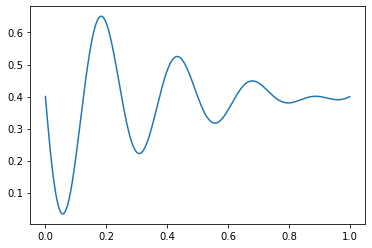

In [35]:
# Create data set

N = 400
x = np.linspace(0,1,N)
y = 0.4 + 0.2 * np.log(x+0.1) * np.sin(8 * 3.14 * x)

plt.plot(x,y)
plt.show()

## 3 Function approximation

Create an ANN model to fit the data. This time there is no need to be concerned about validatition, the result will be plotted against the function to see how the model performs.

Hints:
* you might consider using tanh/sigmoid activation function in hidden layers of the model
* think about the value range of the function - what might be a good activation function in the output layer?
* less that 10 layers should give a complex enough model
* experiment with layer width(s) - way way less that 1000 is enough
* use optimizer='adam' (we'll talk more about optimizers later)
* some tens or even hundreds of epochs might be needed to get a well-performing model

Make a plot of data and model prodictions.

In [92]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape=(1,), activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(1))
#
#
#

model.summary()

model.compile(optimizer='adam', loss='mse')

model.fit(x,y,epochs=400,batch_size=16,verbose=0)

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 100)               200       
_________________________________________________________________
dense_103 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_104 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_105 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_106 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_107 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_108 (Dense)            (None, 100)             

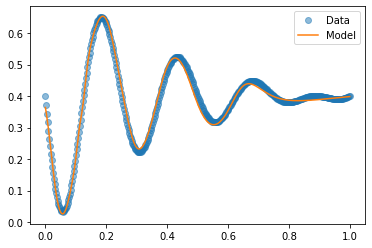

In [93]:
xs = np.linspace(0,1,300)
plt.plot(x, y, 'o', alpha=0.5, label='Data')
plt.plot(xs, model.predict(xs), label="Model")
plt.legend()
plt.show()

## 4 Boston housing with deep net

Load and perprocess Boston housing data and create a deep model (< 5 layers) to predict house prices. You should get better predictions than with the single layer model in examples notebook. Plot training and validation accuracies per epoch.

In [63]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)

x_train_ss = scaler.transform(x_train)
x_test_ss = scaler.transform(x_test)

print("Mean x_train values after standardisation with StandardScaler:")
print(np.mean(x_train_ss, axis=0))
print("Std x_train values after standardisation with StandardScaler:")
print(np.std(x_train_ss, axis=0))

57344/57026 [==============================] - 0s 1us/step
Mean x_train values after standardisation with StandardScaler:
[-1.01541438e-16  1.09923072e-17  1.74337992e-15 -1.26686340e-16
 -5.25377321e-15  6.41414864e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.98136337e-16  2.36686358e-14  5.95679996e-15
  6.13920356e-16]
Std x_train values after standardisation with StandardScaler:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [84]:
model2 = keras.Sequential()

model2.add(layers.Dense(1, input_shape=(13,), activation='relu'))
model2.add(layers.Dense(1, input_shape=(13,), activation='relu'))
model2.add(layers.Dense(1, input_shape=(13,), activation='relu'))
model2.add(layers.Dense(1, input_shape=(13,), activation='relu'))
model2.add(keras.layers.Dense(1))
model2.compile(loss='mse', optimizer='sgd')


In [85]:
n_epochs = 50
hist1 = model2.fit(x_train_ss, y_train, epochs=n_epochs, batch_size = 32, validation_data=(x_test_ss, y_test))

Epoch 1/50
13/13 [==============================] - 0s 6ms/step - loss: 485.3488 - val_loss: 403.7917
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 321.9308 - val_loss: 278.5773
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 225.8807 - val_loss: 202.4541
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 168.3860 - val_loss: 156.7025
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 134.2846 - val_loss: 128.8146
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 114.0391 - val_loss: 111.8946
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 102.0300 - val_loss: 101.3772
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 94.8822 - val_loss: 94.9950
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 90.6853 - val_loss: 90.9831
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 88.1881 - val

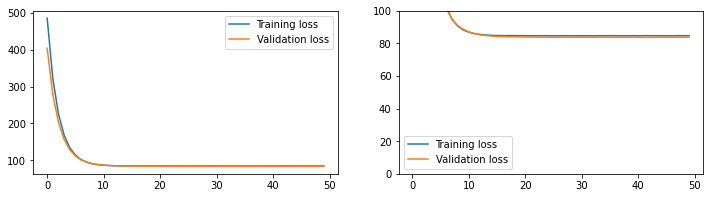

In [89]:
f = plt.figure(figsize=(12,3))

f1 = f.add_subplot(121)
f2 = f.add_subplot(122)

f1.plot(hist1.history['loss'], label="Training loss")
f1.plot(hist1.history['val_loss'], label="Validation loss")
f1.legend()

# make another plot with different scale
f2.set_ylim([0, 100])
f2.plot(hist1.history['loss'], label="Training loss")
f2.plot(hist1.history['val_loss'], label="Validation loss")
f2.legend()

plt.show()
